In [99]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import phate
PROJECT_DIR = "C:/Users/nishu/OneDrive - Universite de Montreal/AlzheimerProejct"

In [2]:
DATA_DIR_raw = PROJECT_DIR + '/data/msPHATE_data_raw.h5ad'
data_raw = sc.read_h5ad(DATA_DIR_raw)
print(data_raw)
# print(data_raw.obs.index)

AnnData object with n_obs × n_vars = 82159 × 32738
    obs: 'id', 'amyloid', 'plaq_n', 'nft', 'tangles', 'cogn_global_lv', 'gpath', 'gpath_3neocort', 'amyloid.group', 'caa_4gp', 'ceradsc', 'braaksc', 'niareagansc', 'cogdx', 'msex', 'pathology.group', 'diagnosis'
    var: 'gene_id'


In [113]:
print(data_raw.obs.diagnosis)

barcode
AAACGGGAGATCCCGC-1     0
AAAGATGCACGGTGTC-1     0
AAATGCCTCCAATGGT-1     0
AACCATGTCAGTGCAT-1     0
AACCATGTCTGTACGA-1     0
                      ..
TTTATGCTCAGAAATG-48    1
TTTATGCTCCGGCACA-48    1
TTTCCTCTCCGTTGCT-48    1
TTTGCGCGTATTACCG-48    1
TTTGTCAGTGACCAAG-48    1
Name: diagnosis, Length: 82159, dtype: int64


In [16]:
DATA_DIR_pp = PROJECT_DIR + '/data/msPHATE_data_pp.h5ad'
data_pp = sc.read(DATA_DIR_pp)
print(data_pp)

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'id', 'tsne1', 'tsne2', 'pre.cluster', 'celltype', 'Subcluster', 'apoe_genotype', 'braak_stage', 'cerad_score', 'age_death', 'sex', 'pmi', 'concensus_diagnosis', 'diagnosis_cerad', 'diagnosis', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


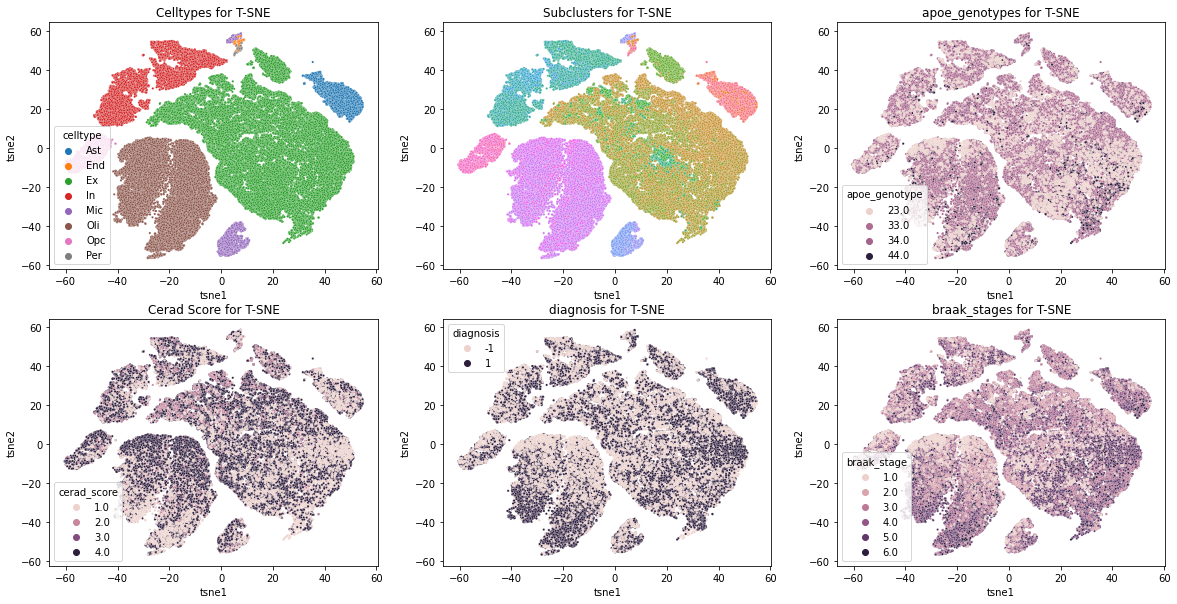

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [128]:
######
# tsne results
######
tsne1 = data_pp.obs.tsne1
tsne2 = data_pp.obs.tsne2
ids = data_pp.obs.id
celltypes = data_pp.obs.celltype
Subclusters = data_pp.obs.Subcluster
cerad_scores = data_pp.obs.cerad_score
diagnosises = data_pp.obs.diagnosis
braak_stages = data_pp.obs.braak_stage
apoe_genotypes = data_pp.obs.apoe_genotype

# plot
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# plt.figure()
# sns.scatterplot(ax=axes[0, 0], x = tsne1, y = tsne2, hue=ids, legend=False, s = 5).set(title='ID for T-SNE')

plt.figure()
celltypes_fig = sns.scatterplot(ax=axes[0,0], x = tsne1, y = tsne2, hue=celltypes, s = 5).set(title='Celltypes for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_celltypes_fig.pdf')

# plt.figure()
Subclusters_fig = sns.scatterplot(ax=axes[0,1], x = tsne1, y = tsne2, hue=Subclusters, legend=False, s = 5).set(title='Subclusters for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_Subclusters_fig.pdf')

plt.figure()
cerad_scores_fig = sns.scatterplot(ax=axes[1,0], x = tsne1, y = tsne2, hue=cerad_scores, s = 5).set(title='Cerad Score for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_ceradscore_fig.pdf')

plt.figure()
diagnosis_fig = sns.scatterplot(ax=axes[1,1], x = tsne1, y = tsne2, hue=diagnosises, s = 5).set(title='diagnosis for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_diagnosis_fig.pdf')

plt.figure()
braak_stages_fig = sns.scatterplot(ax=axes[1,2], x = tsne1, y = tsne2, hue=braak_stages, s = 5).set(title='braak_stages for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_braak_stages_fig.pdf')

plt.figure()
apoe_genotypes_fig = sns.scatterplot(ax=axes[0,2], x = tsne1, y = tsne2, hue=apoe_genotypes, s = 5).set(title='apoe_genotypes for T-SNE')

plt.savefig(PROJECT_DIR + '/figures/tsne_all_fig.pdf')


In [102]:
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(data_raw)

Calculating PHATE...
  Running PHATE on 82159 observations and 32738 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 73.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 73.72 seconds.
    Calculating affinities...
    Calculated affinities in 2.30 seconds.
  Calculated graph and diffusion operator in 150.11 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 12.45 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.20 seconds.
  Calculated landmark operator in 26.83 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 1.72 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.89 seconds.
Calculated PHATE in 188.47 seconds.


In [105]:
print(Y_phate.shape)

(82159, 2)


[Text(0.5, 1.0, 'Celltype for PHATE')]

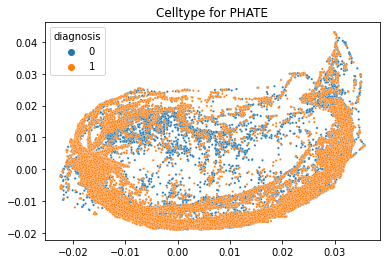

In [115]:
diagnosis_raw = data_raw.obs.diagnosis
plt.figure()
sns.scatterplot(x = Y_phate[:,0], y = Y_phate[:,1], hue=diagnosis_raw, s = 5).set(title='Celltype for PHATE')

In [116]:
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp)

Calculating PHATE...
  Running PHATE on 70634 observations and 17926 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 47.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 134.97 seconds.
    Calculating affinities...
    Calculated affinities in 17.17 seconds.
  Calculated graph and diffusion operator in 200.19 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.56 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.36 seconds.
  Calculated landmark operator in 19.86 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 1.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.32 seconds.
Calculated PHATE in 228.43 seconds.


[Text(0.5, 1.0, 'Celltype for PHATE (preprocessed)')]

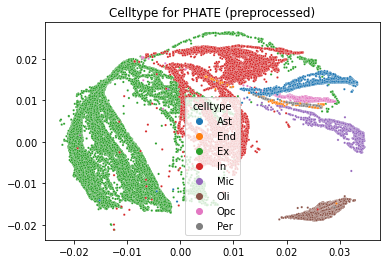

In [117]:
plt.figure()
sns.scatterplot(x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=celltypes, s = 5).set(title='Celltype for PHATE (preprocessed)')

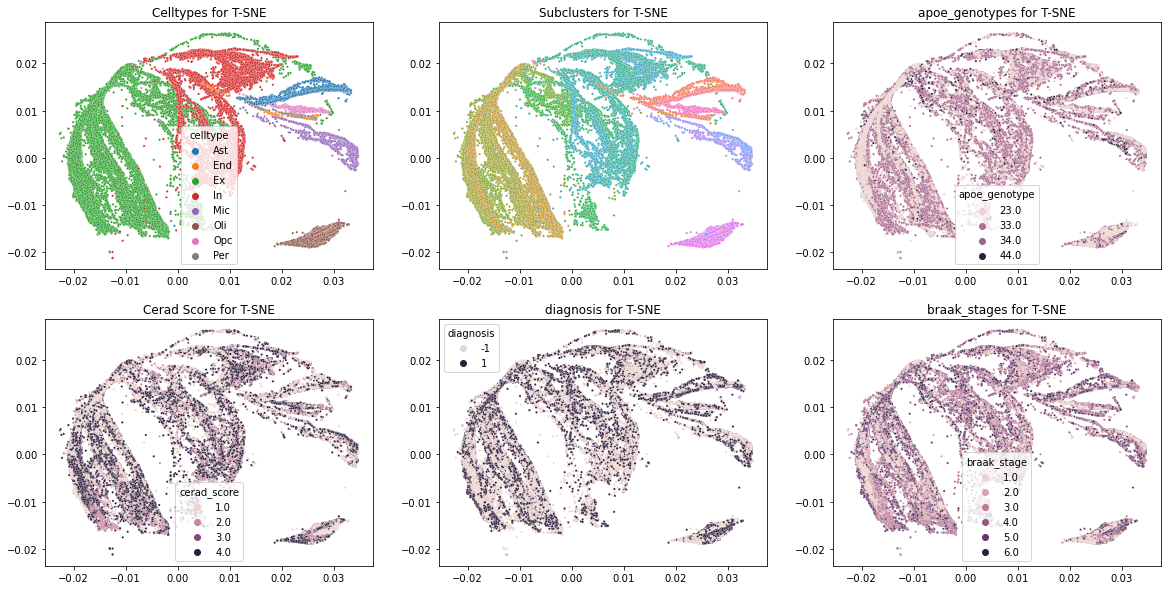

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [118]:
# plot
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# plt.figure()
# sns.scatterplot(ax=axes[0, 0], x = tsne1, y = tsne2, hue=ids, legend=False, s = 5).set(title='ID for T-SNE')

plt.figure()
celltypes_fig = sns.scatterplot(ax=axes[0,0], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=celltypes, s = 5).set(title='Celltypes for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_celltypes_fig.pdf')

# plt.figure()
Subclusters_fig = sns.scatterplot(ax=axes[0,1], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=Subclusters, legend=False, s = 5).set(title='Subclusters for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_Subclusters_fig.pdf')

plt.figure()
cerad_scores_fig = sns.scatterplot(ax=axes[1,0], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=cerad_scores, s = 5).set(title='Cerad Score for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_ceradscore_fig.pdf')

plt.figure()
diagnosis_fig = sns.scatterplot(ax=axes[1,1], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=diagnosises, s = 5).set(title='diagnosis for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_diagnosis_fig.pdf')

plt.figure()
braak_stages_fig = sns.scatterplot(ax=axes[1,2], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=braak_stages, s = 5).set(title='braak_stages for T-SNE')
# plt.savefig(PROJECT_DIR + '/figures/tsne_braak_stages_fig.pdf')

plt.figure()
apoe_genotypes_fig = sns.scatterplot(ax=axes[0,2], x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=apoe_genotypes, s = 5).set(title='apoe_genotypes for T-SNE')

plt.savefig(PROJECT_DIR + '/figures/phate_all_fig.pdf')